In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from sklearn import datasets
data=datasets.load_digits()

In [4]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
data.target.shape

(1797,)

In [6]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
data.images[0].shape

(8, 8)

In [9]:
print(data.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [55]:
x=data.images
y=data.target
y=tf.keras.utils.to_categorical(y)

In [56]:
print(x[10],y[10])

[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


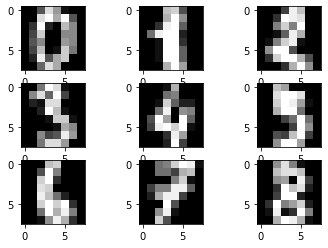

In [78]:
for i in range(9): 
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i], cmap=plt.get_cmap('gray'))
plt.show()

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

##Making Neural Network Model

In [59]:
def make_model():
  model=Sequential([
      Conv2D(32,(3,3),activation='relu',input_shape=(8,8,1)),
      MaxPool2D((2,2)),
      Flatten(),
      Dense(64,activation='relu'),
      Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [60]:
model=make_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 288)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                18496     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
__________________________________________________

In [61]:
x.shape

(1797, 8, 8)

In [62]:
y.shape

(1797, 10)

In [63]:
x_train=x[:1000]
y_train=y[:1000]
x_test=x[1000:]
y_test=y[1000:]

In [64]:
print(x_train[5],y_train[5])

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [65]:
print(y_train[2],y_train[2])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [67]:
import numpy as np
y_pred=model.predict(x_test)
y_pred
y_pred_n=np.argmax(y_pred,axis=1)
y_pred_new=tf.keras.utils.to_categorical(y_pred_n)
y_pred_new[2]

25/25 [==============================] - 0s 1ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [69]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 0.0376 - accuracy: 0.9970 - val_loss: 0.1550 - val_accuracy: 0.9448
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.9970 - val_loss: 0.1534 - val_accuracy: 0.9473
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0321 - accuracy: 0.9980 - val_loss: 0.1497 - val_accuracy: 0.9486
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0296 - accuracy: 0.9990 - val_loss: 0.1494 - val_accuracy: 0.9448
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 0.0270 - accuracy: 0.9970 - val_loss: 0.1479 - val_accuracy: 0.9498
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0253 - accuracy: 0.9990 - val_loss: 0.1428 - val_accuracy: 0.9498
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 0.9523
Epoch 8/10
8/8 [===========

##Classification Report

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_new,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        78
           1       0.85      0.96      0.90        71
           2       0.90      0.97      0.93        71
           3       0.85      0.89      0.87        75
           4       0.90      0.95      0.93        79
           5       0.98      0.94      0.96        85
           6       0.99      0.92      0.95        86
           7       0.96      0.94      0.95        82
           8       0.88      0.91      0.89        74
           9       0.98      0.82      0.89        96

   micro avg       0.92      0.92      0.92       797
   macro avg       0.92      0.93      0.92       797
weighted avg       0.93      0.92      0.92       797
 samples avg       0.92      0.92      0.92       797



In [75]:
print(model.evaluate(x_test,y_pred_new))

25/25 [==============================] - 0s 14ms/step - loss: 0.1004 - accuracy: 0.9699
[0.10041569918394089, 0.9698870778083801]
